In [1]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    df.traja.plot()
    return(df)

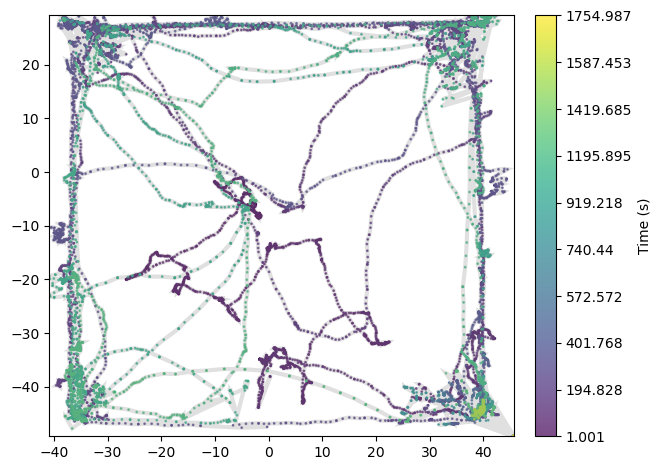

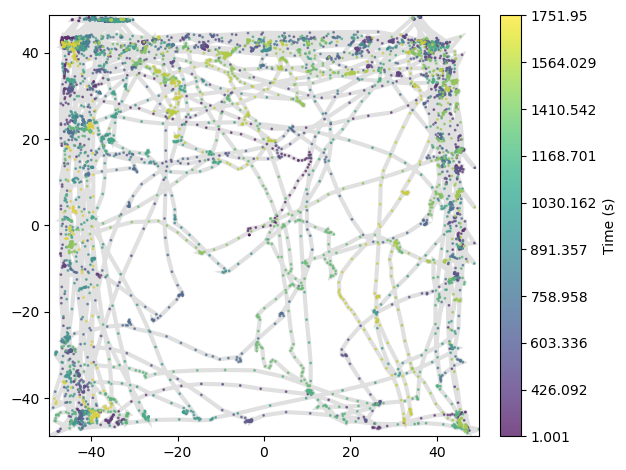

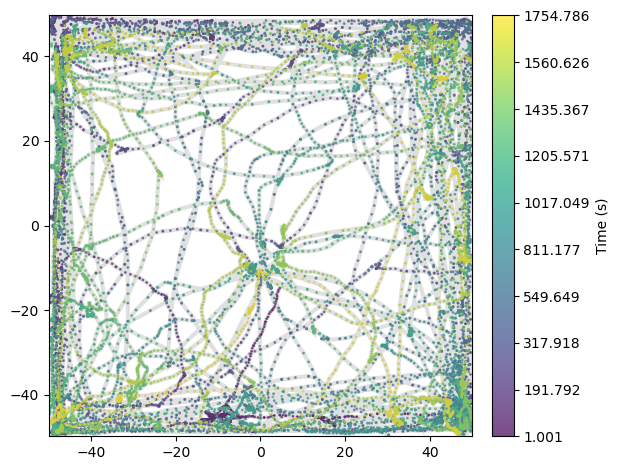

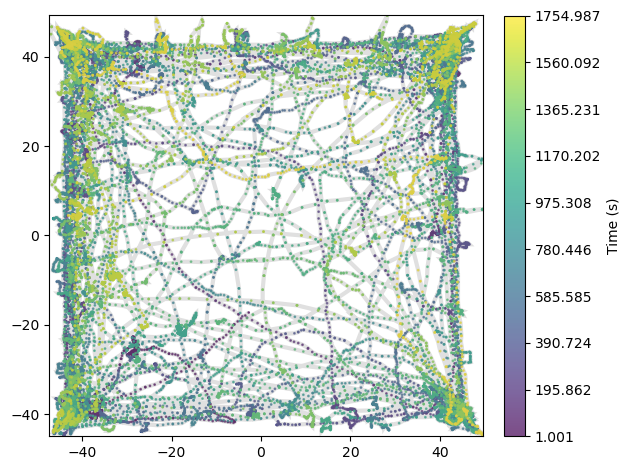

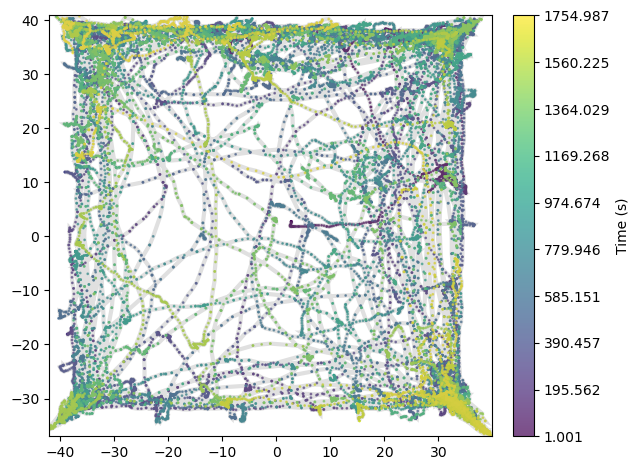

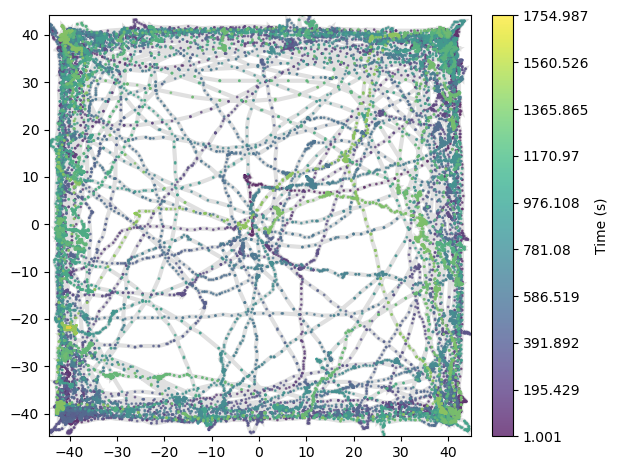

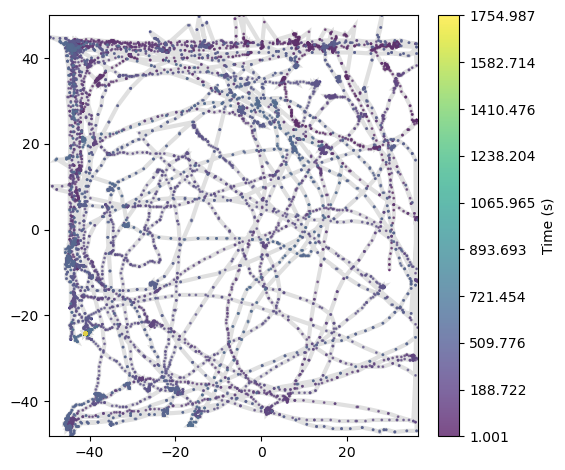

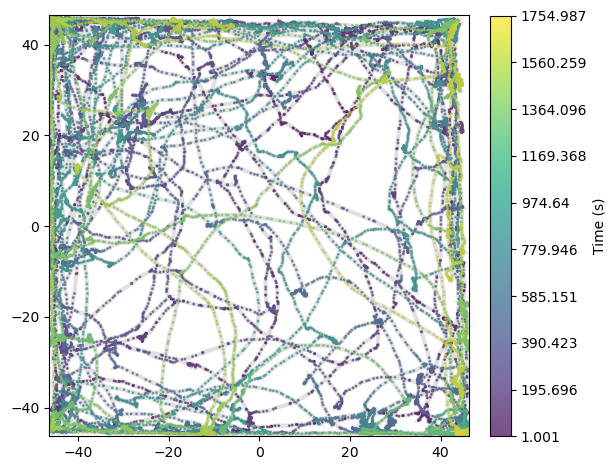

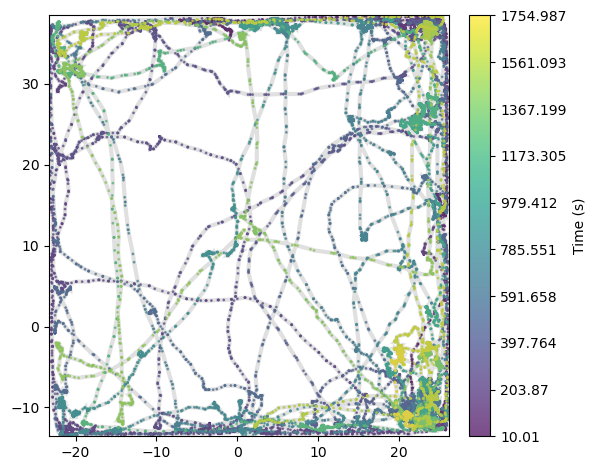

In [3]:
tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
tr1, tr2 = openFile('Trace_1.1.txt'), openFile('Trace_2.txt')

In [4]:
dfs = [tr4, tr3, tr5, tr6, tr7, tr91, tr92, tr1, tr2]
names = ['tr4','tr3','tr5','tr6','tr7', 'tr91','tr92', 'tr1', 'tr2']

In [5]:
%matplotlib

Using matplotlib backend: Qt5Agg


#### движущаяся траектория

In [33]:
time = tr5.iloc[len(tr5)-1,0] - tr5.iloc[0,0]
samp_rate = len(tr5)/ time
print(samp_rate)
nRev = 1/samp_rate
print(nRev)

15.605675724219331
0.0640792502466294


In [35]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [38]:
# a sample dataframe  with coordinates of random movement
#xy = np.random.normal(0, 1, (100, 2)).cumsum(axis=0)
df = pd.DataFrame(tr5, columns=["x", "y"])

# plot setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(df["x"].min() - 2, df["x"].max() + 2)
ax.set_ylim(df["y"].min() - 2, df["y"].max() + 2)
xdata, ydata = [], []
ln, = plt.plot([], [], 'b*')

def update(i):
    """
    updates the plot for each animation frame
    """
    if i < 3000:
        ln.set_data(df.iloc[0:i, 0], df.iloc[0:i, 1])
    else:
        ln.set_data(df.iloc[i-3000:i, 0], df.iloc[i-3000:i, 1])
    return ln,

# animate the plot
ani = FuncAnimation(fig, 
                    update, 
                    frames=len(df), 
                    interval=nRev, # delay of each frame in miliseconds
                    save_count=10,
                    blit=True)
plt.show()

In [23]:
tr5

,time,x,y
0,1.001,4.578,-14.767
1,1.034,4.282,-15.210
2,1.068,4.135,-15.653
3,1.101,3.839,-16.244
4,1.134,3.987,-16.687
...,...,...,...
27364,1754.653,-48.583,-46.221
27365,1754.686,-49.027,-46.516
27366,1754.720,-49.470,-46.811
27367,1754.753,-49.913,-47.550


### добавляем и рисуем скорости

In [5]:
def addV_filtV(df):
    v = []
    ind = range(0, len(df))
    df = df.reindex(ind)
    for i in range(len(df)):
        if i == 0:
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            v.append(vv)
    df.insert(3, "V", v)
    df.insert(4, "V_filt", v)
    df['V_filt'] = pd.Series(gaussian_filter1d(df['V'], 5))
    return(df)

In [6]:
for i in range(len(dfs)):
    dfs[i] = addV_filtV(dfs[i])

In [7]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92', 'tr1', 'tr2']

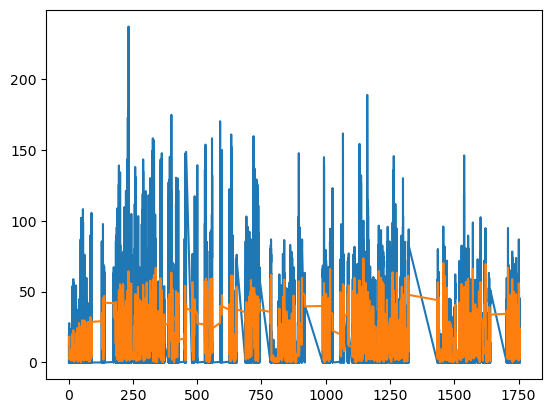

In [8]:
df=dfs[2]
plt.figure()
plt.plot(df['time'],df['V'])
plt.plot(df['time'],df['V_filt'])

In [61]:
%matplotlib

Using matplotlib backend: Qt5Agg


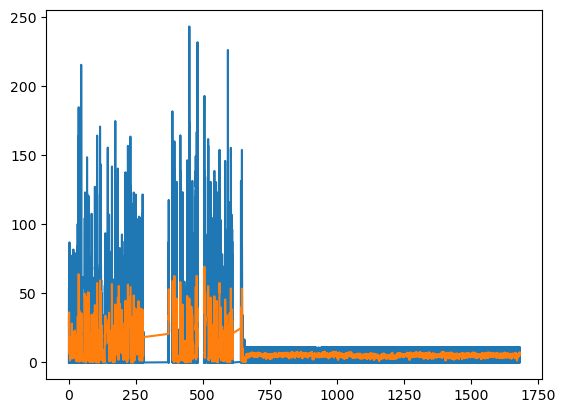

In [9]:
df=dfs[6]
plt.figure()
plt.plot(df['time'],df['V'])
plt.plot(df['time'],df['V_filt'])

In [10]:
time = df.iloc[len(df)-1,0] - df.iloc[0,0]
samp_rate = len(df)/ time
print(samp_rate)
nRev = 1/samp_rate
print(nRev)

27.63659334064155
0.03618390977767255


### делаем карту точек

In [11]:
%matplotlib inline

In [12]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92', 'tr1', 'tr2']

In [13]:
df=dfs[1]

In [14]:
time = df.iloc[len(df)-1,0] - df.iloc[0,0]
samp_rate = len(df)/ time
print(samp_rate)
nRev = 1/samp_rate

3.9669916142617514


In [15]:
tstart = 100000000
vlast = 100000000
#count = 0
#threshold = samp_rate
xx = []
yy = []
if True:
    for i in range(len(df)):
        if df.iloc[i]['V_filt'] <= 5:
            if vlast >=5:
                tstart = df.iloc[i]['time']
            else:
                if df.iloc[i]['time'] - tstart >= 0.8:
                    xx.append(df.iloc[i]['x'])
                    yy.append(df.iloc[i]['y'])
        else:
            tstart = 100000000               
        vlast = df.iloc[i]['V']


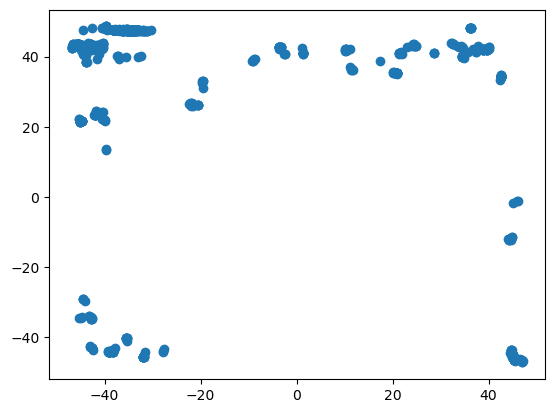

In [16]:
plt.scatter(xx,yy)

In [17]:
def plotPauses(df):
    tstart = 100000000
    vlast = 100000000
    xx = []
    yy = []
    
    for i in range(len(df)):
        if df.iloc[i]['V_filt'] <= 10:
            if vlast > 10:
                tstart = df.iloc[i]['time']
            #elif df.iloc[i]['time'] - tstart >= 0.8:
                    #xx.append(df.iloc[i]['x'])
                    #yy.append(df.iloc[i]['y'])
            xlast = df.iloc[i]['x']
            ylast = df.iloc[i]['y']
        else:
            if (df.iloc[i]['time'] - tstart >= 0.5) and (vlast<=10):
                xx.append(xlast)
                yy.append(ylast)
            tstart = 100000000
        vlast = df.iloc[i]['V']
    plt.figure()
    plt.scatter(xx,yy)


In [30]:
%matplotlib inline

In [25]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92', 'tr1', 'tr2']

<Figure size 640x480 with 0 Axes>

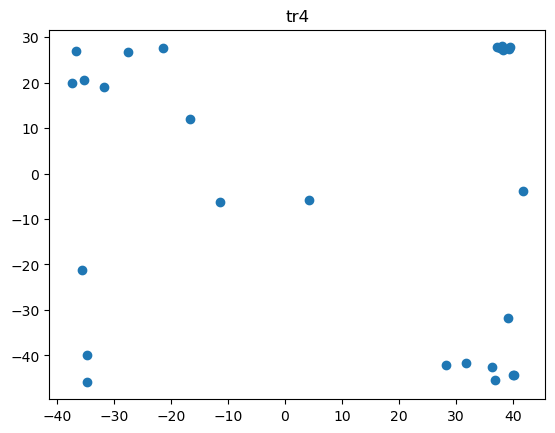

<Figure size 640x480 with 0 Axes>

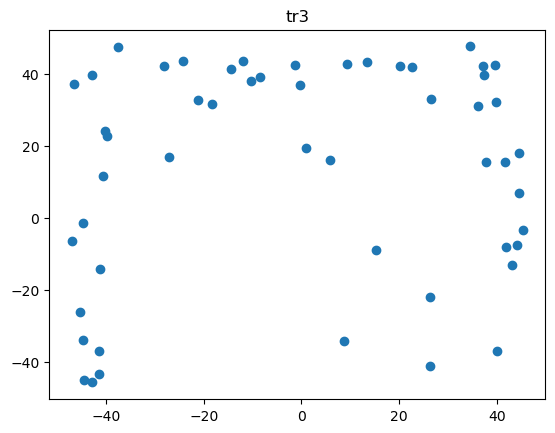

<Figure size 640x480 with 0 Axes>

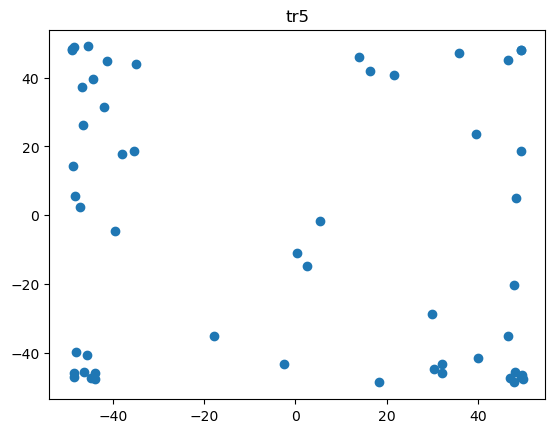

<Figure size 640x480 with 0 Axes>

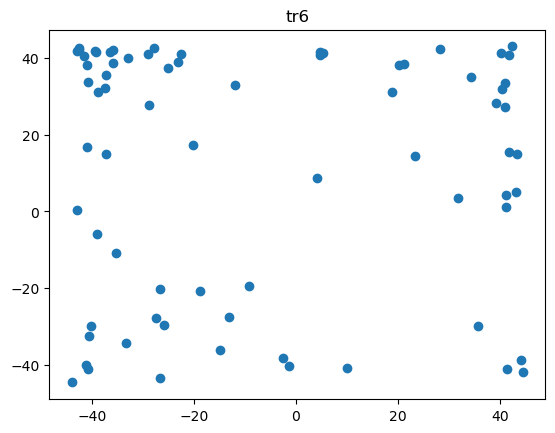

<Figure size 640x480 with 0 Axes>

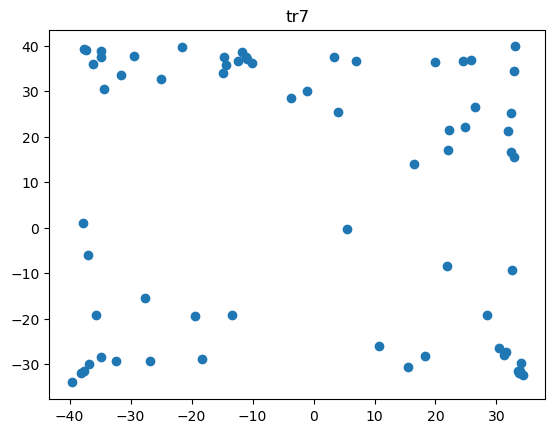

<Figure size 640x480 with 0 Axes>

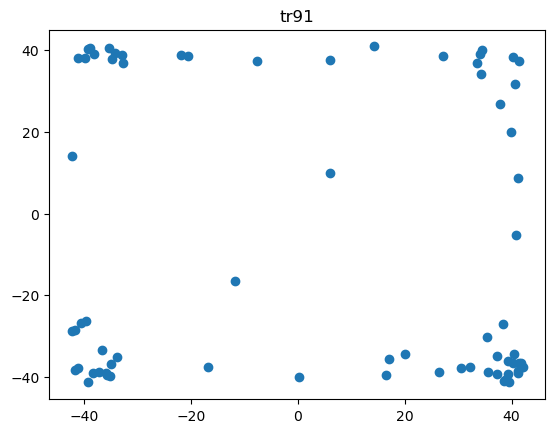

<Figure size 640x480 with 0 Axes>

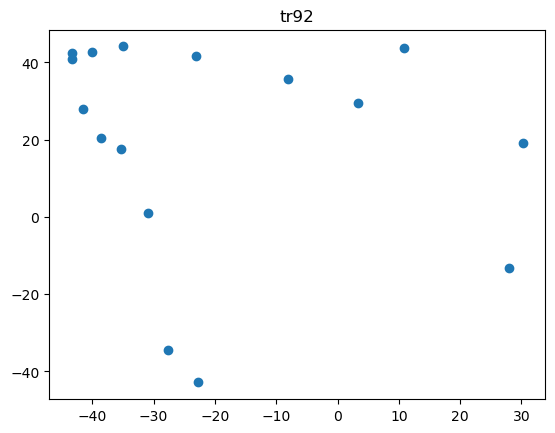

<Figure size 640x480 with 0 Axes>

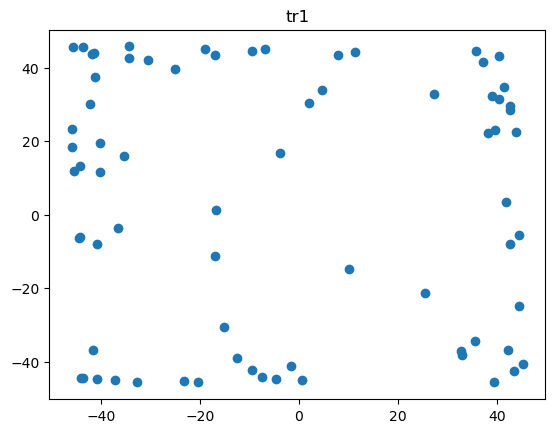

<Figure size 640x480 with 0 Axes>

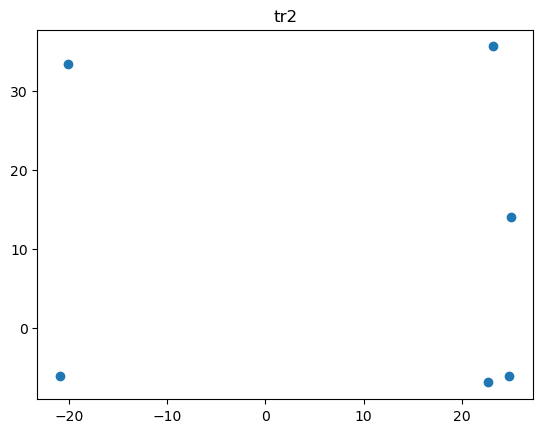

In [32]:
for i in range(len(names)):
    plt.figure()
    plotPauses(dfs[i])
    plt.title(names[i])
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\restingPoints\\' + names[i] +'.png')

Text(0.5, 1.0, 'tr4')

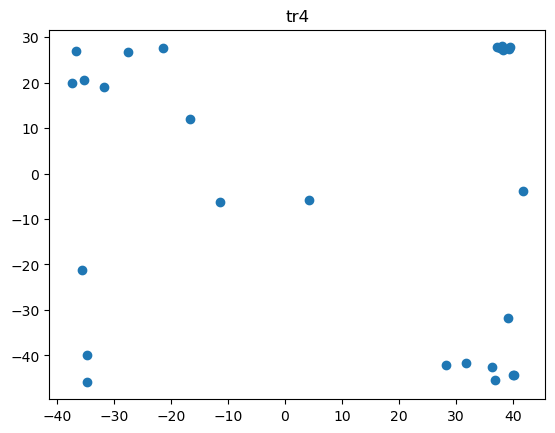

In [31]:
plotPauses(dfs[0])
plt.title(names[0])

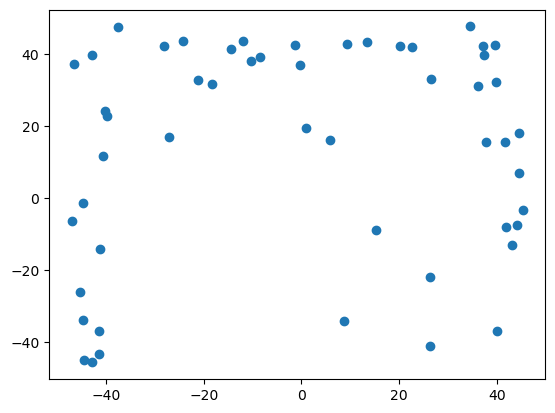

In [20]:
plotPauses(dfs[1])

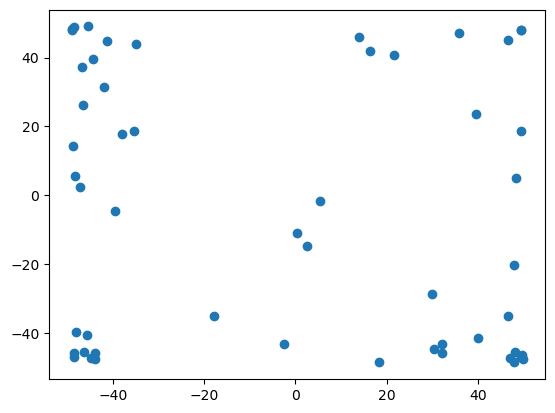

In [21]:
plotPauses(dfs[2])

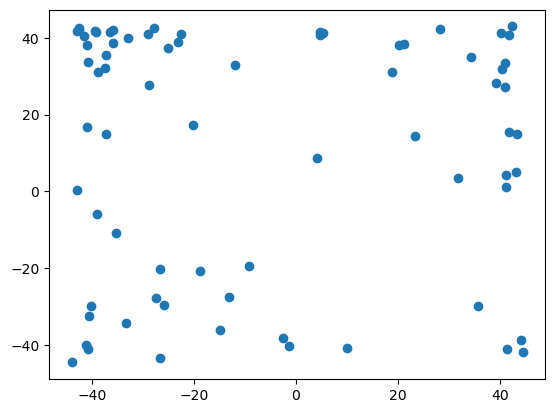

In [22]:
plotPauses(dfs[3])

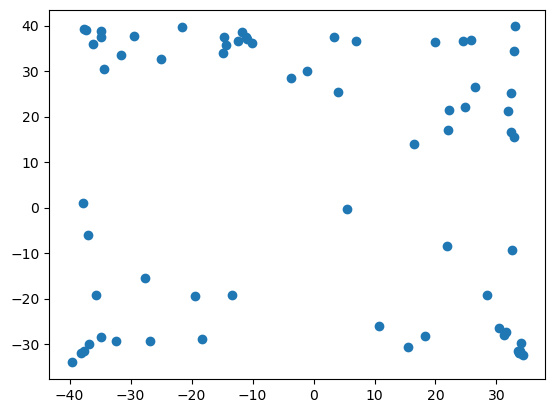

In [23]:
plotPauses(dfs[4])

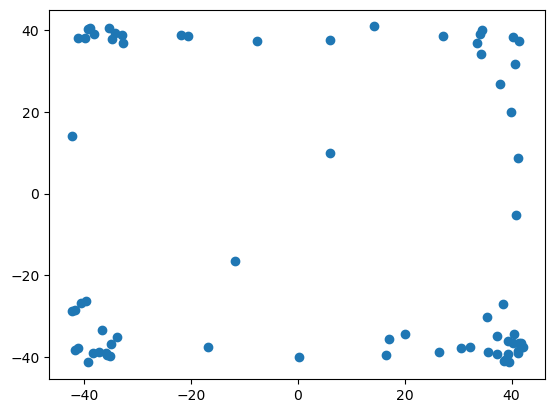

In [24]:
plotPauses(dfs[5])

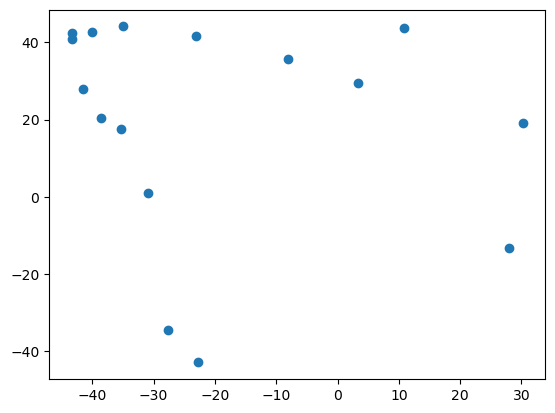

In [59]:
plotPauses(dfs[6])

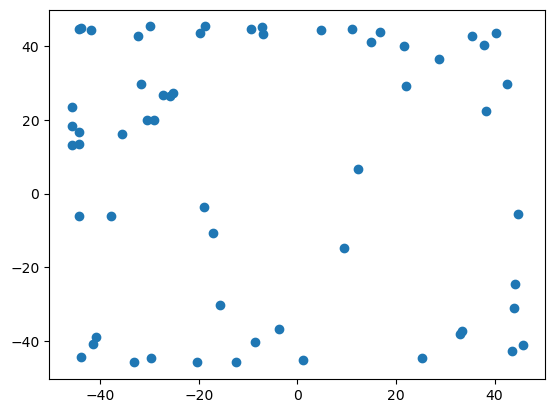

In [54]:
plotPauses(dfs[7])

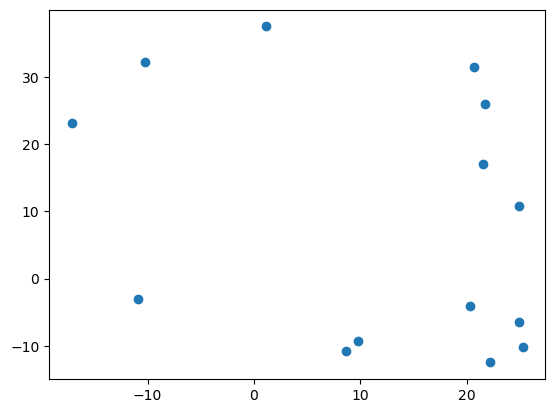

In [55]:
plotPauses(dfs[8])

In [56]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92', 'tr1', 'tr2']